<a href="https://colab.research.google.com/github/StephenNaboth/Financial_engineering/blob/master/GWP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MScFE 642 DEEP LEARNING FOR FINANCE
#Group Work Project 1

# Step 1

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import statsmodels.api as sm



In [ ]:
# Fetch historical data for Apple (AAPL) from Yahoo Finance
df = yf.download('AAPL', start='2016-06-01', end='2024-01-01')
df.tail(10)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.431885,46482500
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900


In [ ]:
# Display summary statistics
print("Summary Statistics:")
print(df['Close'].describe())


Summary Statistics:
count    1909.000000
mean       94.339760
std        55.171145
min        23.010000
25%        43.200001
50%        74.702499
75%       147.059998
max       198.110001
Name: Close, dtype: float64


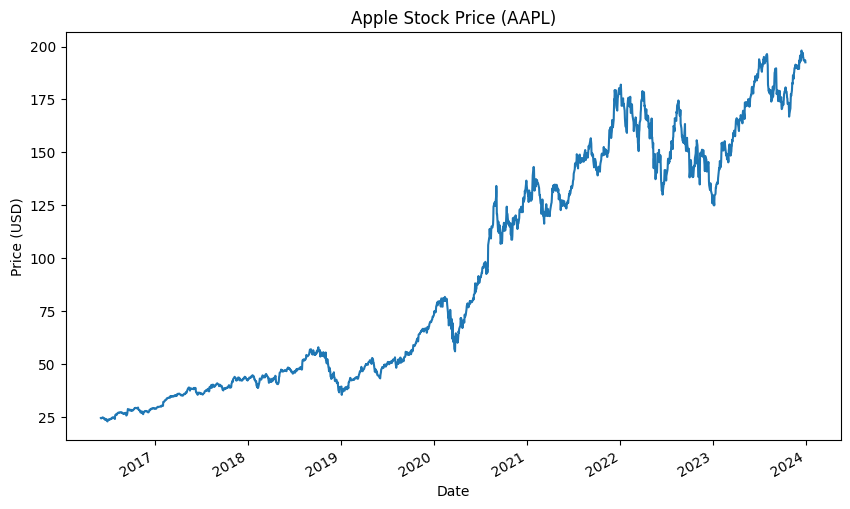

In [ ]:
# Plot the time series
df['Close'].plot(figsize=(10, 6))
plt.title('Apple Stock Price (AAPL)')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()



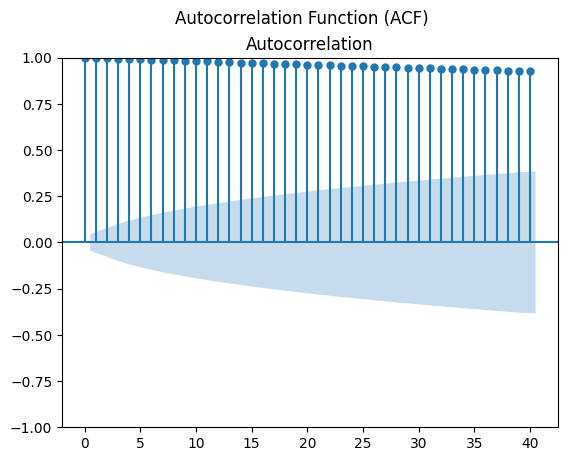

In [ ]:
# Check for autocorrelation
acf = sm.tsa.graphics.plot_acf(df['Close'], lags=40, alpha=0.05)
acf.suptitle('Autocorrelation Function (ACF)')
plt.show()





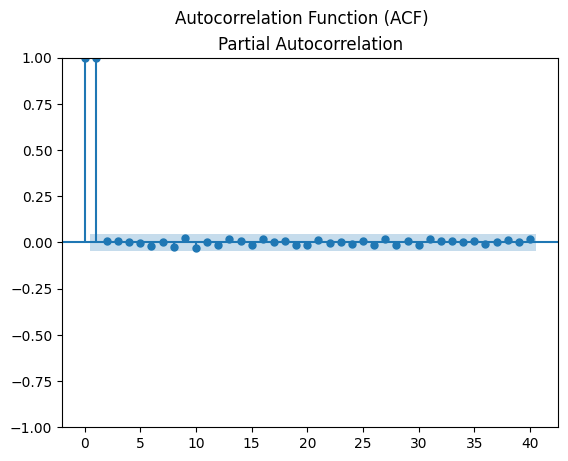

In [ ]:
# Check for partial autocorrelation
acf = sm.tsa.graphics.plot_pacf(df['Close'], lags=40, alpha=0.05)
acf.suptitle('Autocorrelation Function (ACF)')
plt.show()


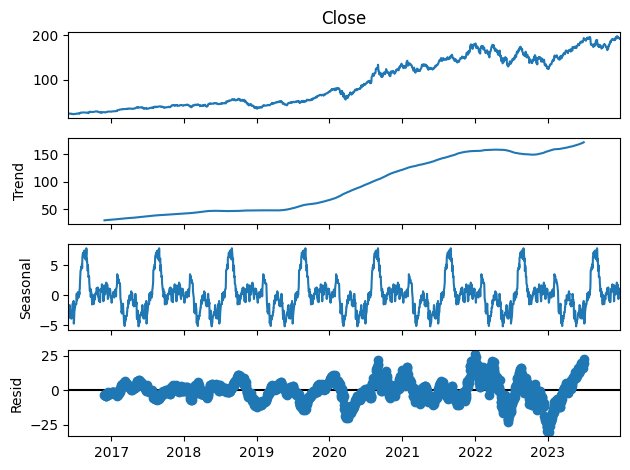

In [ ]:
# Check for seasonality
seasonal_decompose_result = sm.tsa.seasonal_decompose(df['Close'], model='additive', period=252)
seasonal_decompose_result.plot()
plt.show()

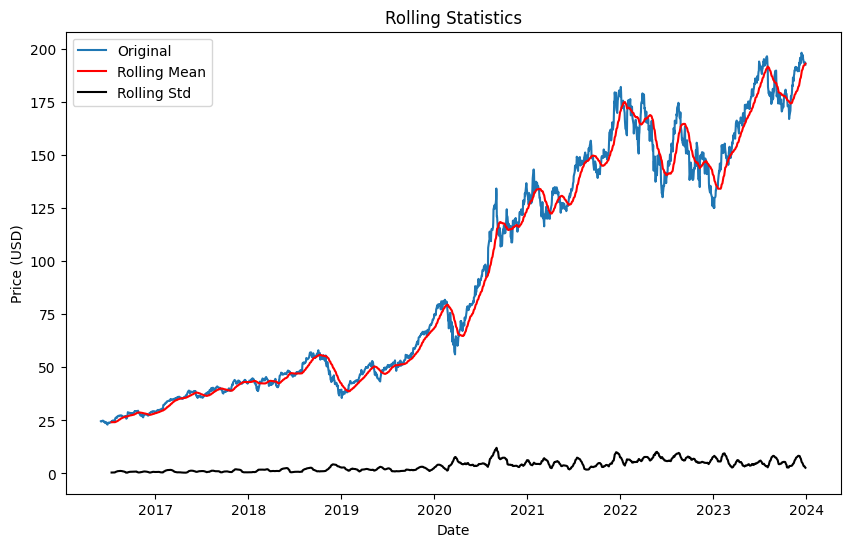

In [ ]:
# Check for trends using rolling statistics
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend()
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()



In [ ]:
# Check for stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(df['Close'])
print("\nAugmented Dickey-Fuller Test:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")




Augmented Dickey-Fuller Test:
ADF Statistic: -0.2643029597045315
p-value: 0.9304101466262643
Critical Values:
	1%: -3.433814658052138
	5%: -2.8630704504871605
	10%: -2.56758475462613


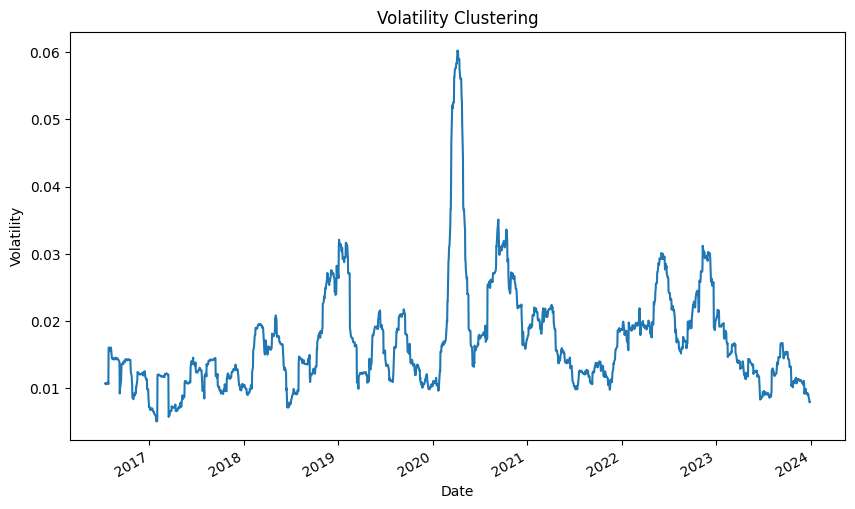

In [ ]:
# Check for volatility clustering
daily_returns = df['Close'].pct_change().dropna()
volatility = daily_returns.rolling(window=30).std()
volatility.plot(figsize=(10, 6))
plt.title('Volatility Clustering')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

In [ ]:
# Calculate daily returns
df['Returns'] = df['Close'].pct_change()
df.dropna(inplace=True)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700,-0.002726
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.431885,46482500,-0.000770
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.000518
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,0.002226


In [ ]:
# Display summary statistics for returns
print("Summary Statistics for Returns:")
print(df['Returns'].describe())



Summary Statistics for Returns:
count    1908.000000
mean        0.001250
std         0.018504
min        -0.128647
25%        -0.007311
50%         0.000994
75%         0.010173
max         0.119808
Name: Returns, dtype: float64


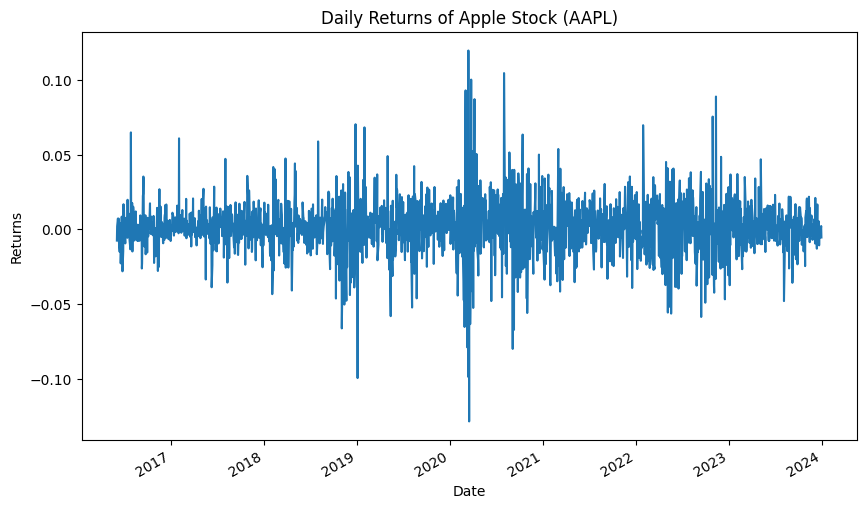

In [ ]:
# Plot the returns time series
df['Returns'].plot(figsize=(10, 6))
plt.title('Daily Returns of Apple Stock (AAPL)')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.show()


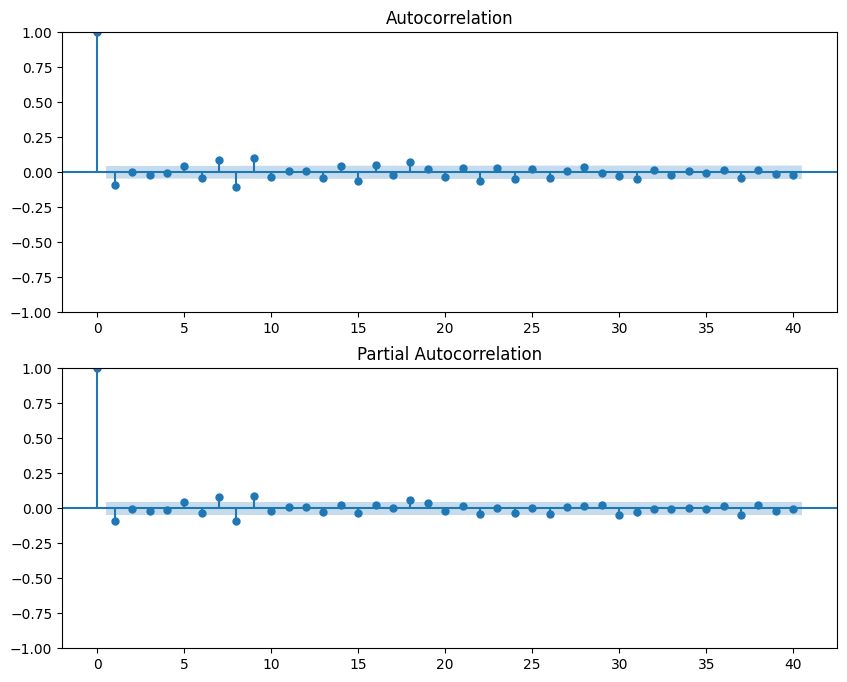

In [ ]:

# Check for autocorrelation and partial autocorrelation of returns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sm.tsa.graphics.plot_acf(df['Returns'], lags=40, ax=axes[0])
sm.tsa.graphics.plot_pacf(df['Returns'], lags=40, ax=axes[1])
plt.show()



In [ ]:

# Check for stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(df['Returns'])
print("\nAugmented Dickey-Fuller Test for Returns:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")


Augmented Dickey-Fuller Test for Returns:
ADF Statistic: -13.826418133817034
p-value: 7.734558201756197e-26
Critical Values:
	1%: -3.4337982155955413
	5%: -2.8630631915206006
	10%: -2.5675808895205785


## Fractional differencing

In [ ]:
# Functions for fractional differencing
def getWeights(d, lags):
    # Return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w = [1]
    for k in range(1, lags):
        w.append(-w[-1] * ((d - k + 1)) / k)
    w = np.array(w).reshape(-1, 1)
    return w

def ts_differencing(series, order, lag_cutoff):
    # Return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    weights = getWeights(order, lag_cutoff)
    res = 0
    for k in range(lag_cutoff):
        res += weights[k] * series.shift(k).fillna(0)
    return res[lag_cutoff:]

def plotWeights(dRange, lags, numberPlots):
    weights = pd.DataFrame(np.zeros((lags, numberPlots)))
    interval = np.linspace(dRange[0], dRange[1], numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i] = getWeights(diff_order, lags)
    weights.columns = [round(x, 2) for x in interval]
    fig = weights.plot(figsize=(15, 6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    plt.show()


In [ ]:
# Perform fractional differencing
df['FracDiff'] = ts_differencing(df['Close'], order=0.5, lag_cutoff=10)

# Drop NaN values introduced by fractional differencing
df.dropna(inplace=True)

df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,Returns,FracDiff
Date,,,,,,,,
2023-12-15,197.529999,198.399994,197.000000,197.570007,197.318222,128256700,-0.002726,37.021182
2023-12-18,196.089996,196.630005,194.389999,195.889999,195.640350,55751900,-0.008503,35.308629
2023-12-19,196.160004,196.949997,195.889999,196.940002,196.689026,40714100,0.005360,37.103124
2023-12-20,196.899994,197.679993,194.830002,194.830002,194.581711,52242800,-0.010714,34.586409
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.431885,46482500,-0.000770,35.408251
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.005547,34.633912
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.002841,34.728866
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.000518,35.307676
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,0.002226,35.898463


In [ ]:
# Display summary statistics for the fractional differenced series
print("Summary Statistics for Fractional Differenced Series:")
print(df['FracDiff'].describe())



Summary Statistics for Fractional Differenced Series:
count    1898.000000
mean       17.720619
std        10.457133
min         3.525611
25%         8.029014
50%        14.612584
75%        27.350007
max        40.184560
Name: FracDiff, dtype: float64


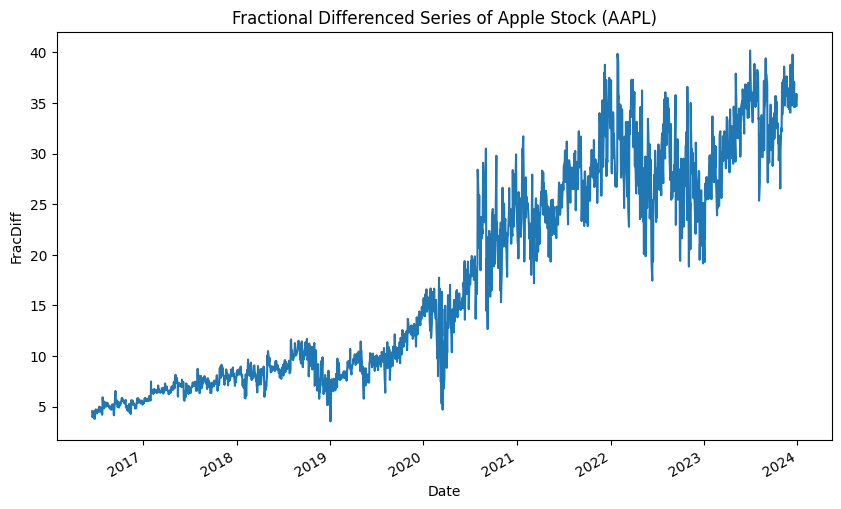

In [ ]:
# Plot the fractional differenced series
df['FracDiff'].plot(figsize=(10, 6))
plt.title('Fractional Differenced Series of Apple Stock (AAPL)')
plt.ylabel('FracDiff')
plt.xlabel('Date')
plt.show()



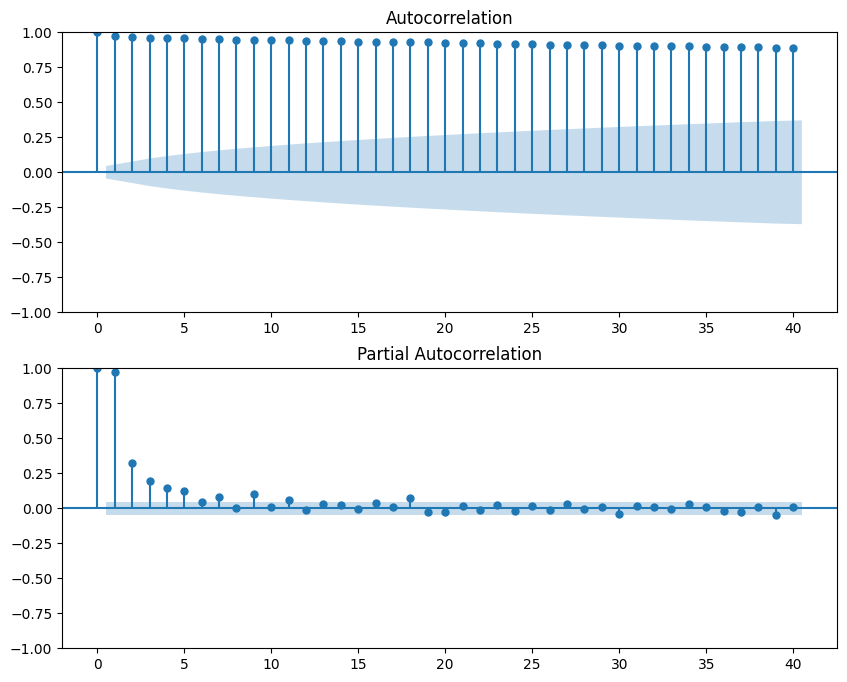

In [ ]:
# Check for autocorrelation and partial autocorrelation of the fractional differenced series
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sm.tsa.graphics.plot_acf(df['FracDiff'], lags=40, ax=axes[0])
sm.tsa.graphics.plot_pacf(df['FracDiff'], lags=40, ax=axes[1])
plt.show()



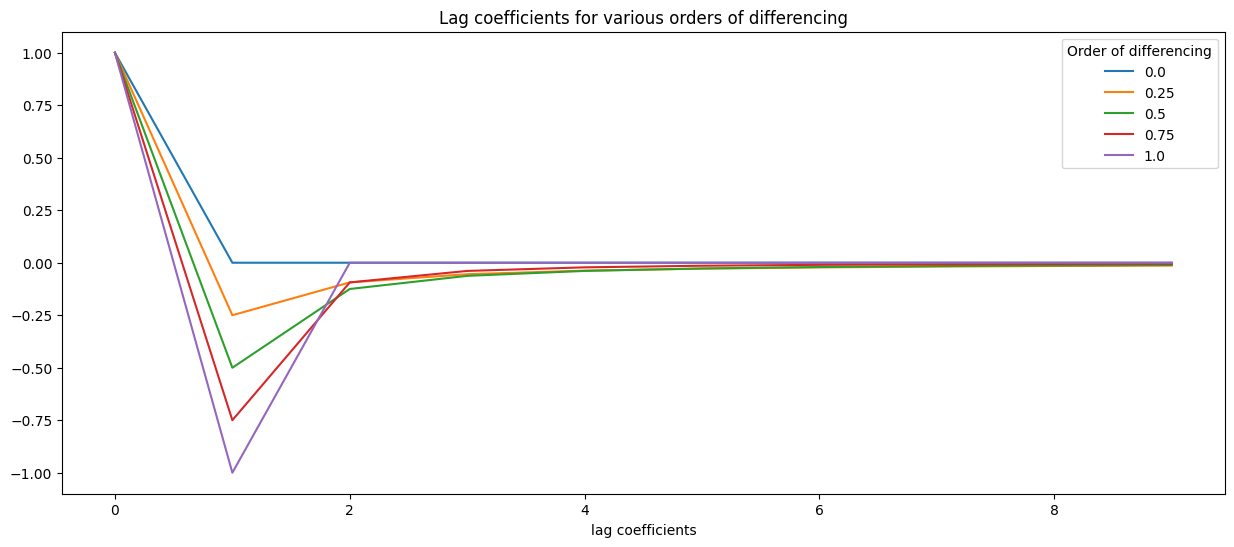

In [ ]:
# Plot weights for various orders of differencing
plotWeights((0, 1), lags=10, numberPlots=5)

In [ ]:
# Check for stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(df['FracDiff'])
print("\nAugmented Dickey-Fuller Test for Fractional Differenced Series:")
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")


Augmented Dickey-Fuller Test for Fractional Differenced Series:
ADF Statistic: -0.5307144184273829
p-value: 0.8858821477038785
Critical Values:
	1%: -3.433833112339179
	5%: -2.8630785975831463
	10%: -2.5675890926324128
